In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

df = pd.read_csv('train.csv', sep = ';')
df.sample(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
37867,50,management,single,secondary,no,4527,yes,no,cellular,14,may,140,1,-1,0,unknown,no
28848,28,blue-collar,single,secondary,no,1285,no,no,telephone,30,jan,199,2,2,17,other,no
15320,33,services,single,secondary,no,3269,no,yes,cellular,18,jul,316,1,-1,0,unknown,no
35617,29,management,married,tertiary,no,202,yes,no,cellular,7,may,378,1,-1,0,unknown,no
39026,48,services,divorced,secondary,no,-203,yes,no,cellular,18,may,156,5,297,1,other,no


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [3]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


Text(0.5, 1.0, 'Monthly Trend of Customer Conversion')

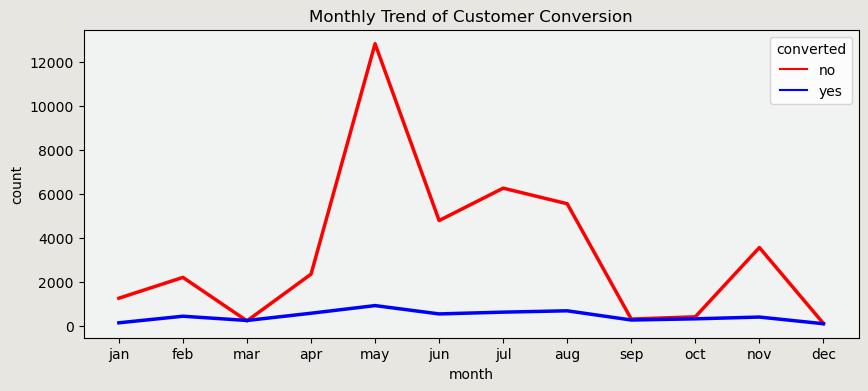

In [126]:
df_month = df.groupby(['month', 'y'])['campaign'].count().reset_index()
df_month['month'] = pd.Categorical(values = df_month['month'], categories = ['jan', 'feb', 'mar', 'apr', 
                                                                             'may', 'jun', 'jul', 'aug', 
                                                                             'sep', 'oct', 'nov', 'dec'], ordered = True)
df_month = df_month.sort_values(by = 'month').reset_index(drop = True).rename(columns = {'y' : 'converted', 'campaign' : 'count'})
fig = plt.figure(figsize = (10, 4), facecolor = '#e8e6e1')
sns.lineplot(x = df_month['month'], y = df_month['count'], hue = df_month['converted'], ax = fig.add_subplot(1,1, 1, facecolor = '#f1f2f2'), lw = 2.5, palette = ['#ff0000', '#0000ff'])
plt.title('Monthly Trend of Customer Conversion')

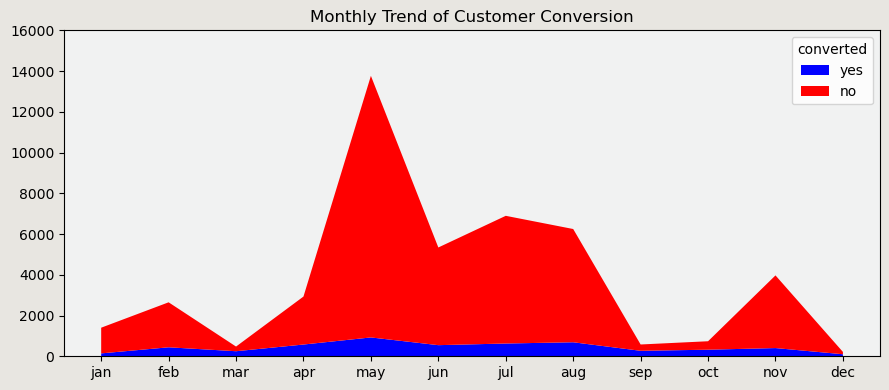

In [187]:
df_month_pivot = pd.pivot_table(df_month, index = ['month'], columns = ['converted']).reset_index()
df_month_pivot.columns = ['month', 'no', 'yes']
fig, ax = plt.subplots(1,1, figsize=(9, 4), facecolor = '#e8e6e1')
ax.stackplot(df_month_pivot['month'], df_month_pivot['yes'], df_month_pivot['no'], labels = ['yes', 'no'], colors = ['#0000ff', '#ff0000'])
ax.set_facecolor('#f1f2f2')
ax.set_ylim(top = 16000)
plt.legend(title = 'converted')
plt.title('Monthly Trend of Customer Conversion')
plt.tight_layout()

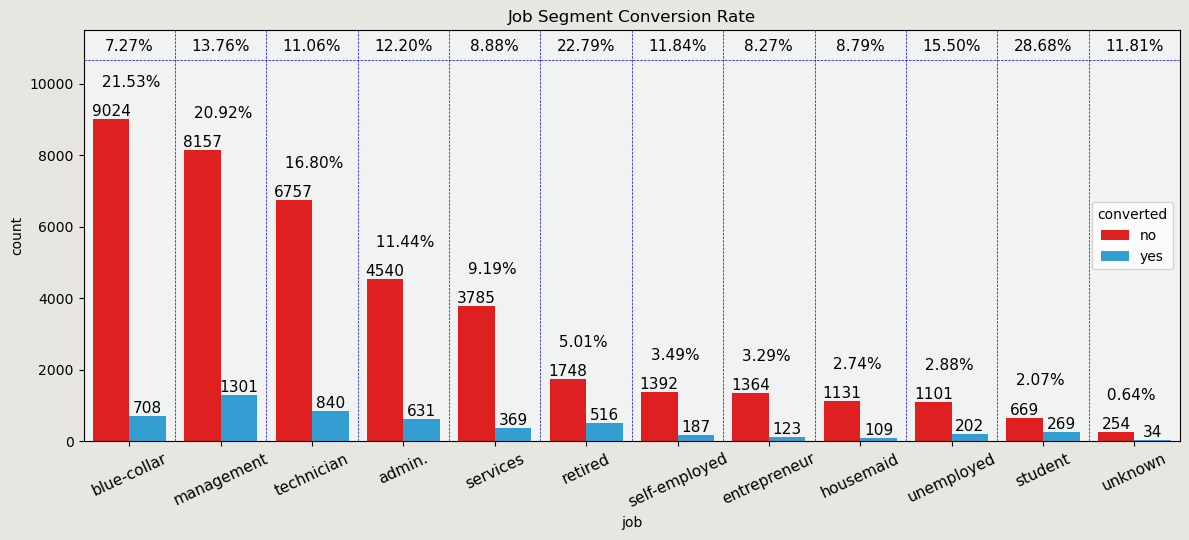

In [116]:
def percentage_above_bar_relative_to_xgroup(ax):
    all_heights = [[p.get_height() for p in bars] for bars in ax.containers]
    for bars in ax.containers:
        for i, p in enumerate(bars):
            total = sum(xgroup[i] for xgroup in all_heights)
            percentage = f'{(100 * p.get_height() / total) :.2f}%'
            if round(p.get_x(), 2) in list(np.arange(-0.0, 12.0, 1.0)): 
                ax.annotate(percentage, (p.get_x(), ax.get_ylim()[1] - 650), size=11, ha='center', va='bottom')
                plt.axvline(x = p.get_x() + 0.5, color = 'blue', ls = '--', lw = 0.5)

def barplot_values_percent(ax):
    for i, p in enumerate(ax.patches):
        if i < len(df_job[df_job['converted'] == 'no'].sort_values(by = ['count'], ascending = [False]).reset_index(drop = True)['percentage']):
            x = p.get_x() + 0.05
            height = (p.get_height()) + 900
            value = f"{(df_job[df_job['converted'] == 'no'].sort_values(by = ['count'], ascending = [False]).reset_index(drop = True)['percentage'][i]) : .2f}%"
            ax.text(x, height, value, fontsize=11,color='black')

df_job = df.groupby(['job', 'y']).count().reset_index()[['job', 'y', 'campaign']]
df_job.columns = ['job', 'converted', 'count']
df_job = df_job.merge(df_job.groupby(['job']).sum().reset_index(), on = 'job')\
                .rename(columns = {'count_x' : 'count', 'count_y' : 'sub_total'})
df_job['percentage'] = df_job['sub_total'].apply(lambda x : round(x / df_job['count'].sum() * 100, 2))
df_job = df_job.sort_values(by = ['count'], ascending = [False])

fig = plt.figure(figsize = (12, 5.5), facecolor = '#e8e6e1')
ax = sns.barplot(x = df_job['job'], y = df_job['count'], hue = df_job['converted'], estimator = sum, ax = fig.add_subplot(1,1, 1, facecolor = '#f1f2f2'), palette = ['#ff0000', '#1aa7ec'])
for i in range(len(ax.containers)):
    ax.bar_label(ax.containers[i], fontsize = 11)
ax.set_ylim(top = 11500)
plt.axhline(y = ax.get_ylim()[1] - 820, color = 'blue', ls = '--', lw = 0.5)
plt.xticks(rotation = 25, fontsize = 11)
plt.title('Job Segment Conversion Rate')
plt.legend(title = 'converted', loc = 'center right')
percentage_above_bar_relative_to_xgroup(ax)
barplot_values_percent(ax)
plt.tight_layout()

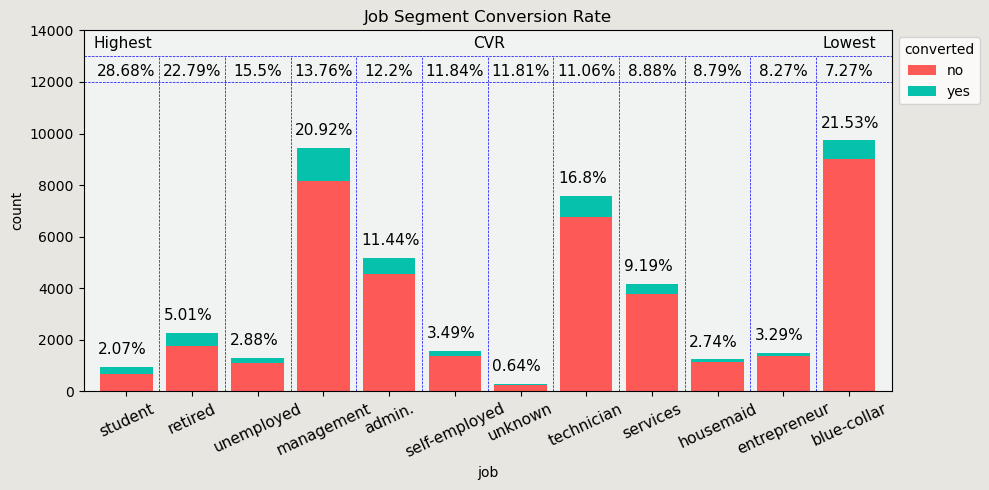

In [77]:
def percentage_above_bar_relative_to_xgroup(ax):
    for bars in ax.containers:
        for i, p in enumerate(bars):            
            if p.get_y() == 0:
                ax.annotate(f"{df_job['percentage_conv'][i]}%", (p.get_x() + 0.4, ax.get_ylim()[1] - 1900),\
                            size=11, ha='center', va='bottom')
                if i != len(bars) - 1:
                    plt.axvline(x = p.get_x() + 0.9, color = 'blue', ls = '--', lw = 0.5,\
                                ymax = 13000 / ax.get_ylim()[1] , ymin = 0)
            else:
                ax.text(p.get_x() - 0.03, p.get_height() + p.get_y() + 500, f"{df_job['percentage_segment'][i]}%",\
                        fontsize=11,color='black')

fig = plt.figure(figsize = (10, 5), facecolor = '#e8e6e1')
df_job = df.groupby(['job', 'y'])[['campaign']].count().reset_index()
df_job = df_job.pivot_table(df_job, index = ['job'], columns = ['y']).reset_index()
df_job.columns = ['job', 'no', 'yes']
df_job['percentage_conv'] = round(df_job['yes'] / (df_job['yes'] + df_job['no']) * 100, 2)
df_job['percentage_segment'] = round((df_job['no'] + df_job['yes']) / (df_job['no'].sum() + df_job['yes'].sum()) * 100, 2)
df_job = df_job.sort_values(by = ['percentage_conv'], ascending = False).set_index(['job'])
ax = df_job[df_job.columns[~df_job.columns.isin(df_job.columns[df_job.columns.str.contains('^percentage')])]]\
        .plot(kind = 'bar', stacked = True, ax = fig.add_subplot(1,1, 1, facecolor = '#f1f2f2'),
              color = ['#fd5956', '#06c2ac'], edgecolor = 'none', width = 0.8)
ax.set_ylim(top = 14000)
plt.xticks(fontsize = 11, rotation = 25)
plt.ylabel('count')
plt.title('Job Segment Conversion Rate')
plt.legend(title = 'converted', loc = 'upper left', bbox_to_anchor = (1,1), labels = ['no', 'yes'])
plt.axhline(y = ax.get_ylim()[1] - 2000, color = 'blue', ls = '--', lw = 0.5)
plt.axhline(y = ax.get_ylim()[1] - 1000, color = 'blue', ls = '--', lw = 0.5)
percentage_above_bar_relative_to_xgroup(ax)
ax.text(5.28, 13300, "CVR", fontsize=11,color='black')
ax.text(-0.5, 13300, "Highest", fontsize=11,color='black')
ax.text(10.6, 13300, "Lowest", fontsize=11,color='black')
plt.tight_layout()

Text(0.5, 1.0, 'Distribusi Fitur Age')

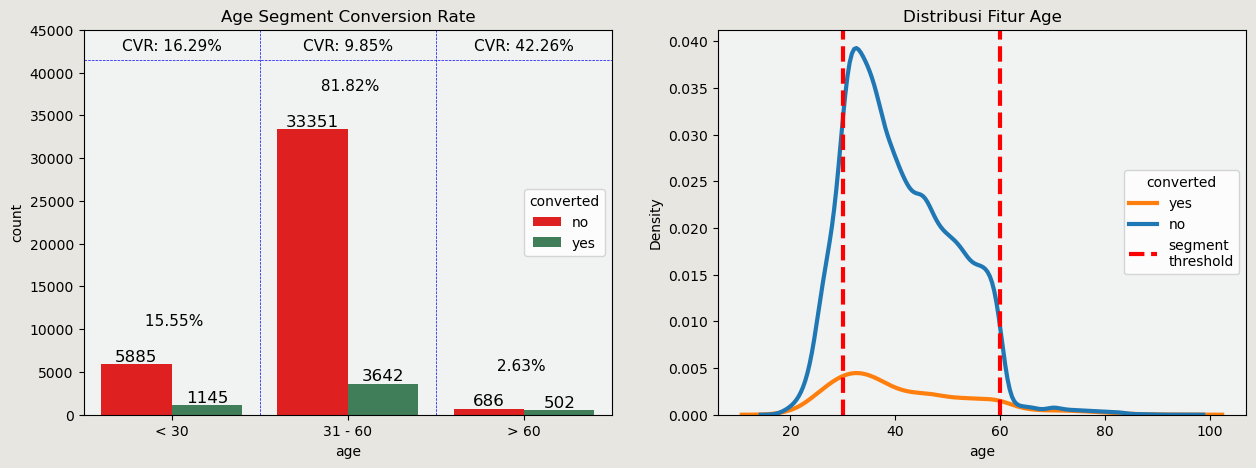

In [304]:
def percentage_above_bar_relative_to_xgroup(ax):
    all_heights = [[p.get_height() for p in bars] for bars in ax.containers]
    for bars in ax.containers:
        for i, p in enumerate(bars):
            total = sum(xgroup[i] for xgroup in all_heights)
            percentage = f'CVR: {(100 * p.get_height() / total) :.2f}%'
            if round(p.get_x(), 2) in list(np.arange(-0.0, 3.0, 1.0)):
                ax.annotate(percentage, (p.get_x(), ax.get_ylim()[1] - 2800), size=11, ha='center', va='bottom')
                plt.axvline(x = p.get_x() + 0.5, color = 'blue', ls = '--', lw = 0.5)

def barplot_values_percent(ax):
    for i, p in enumerate(ax.patches):
        if i < len(df_age.groupby(['age'])['percentage'].mean()):
            x = p.get_x() + 0.22
            height = (p.get_height()) + 4500
            value = f"{(df_age.groupby(['age'])['percentage'].mean()[i]) : .2f}%"
            ax.text(x, height, value, fontsize=11,color='black')
            
df_age = df.groupby([pd.cut(x = df['age'], bins = [0, 30, 60, 95]), 'y']).count()\
                .rename(columns = {'age' : 'count'}).reset_index().rename(columns = {'y' : 'converted'})\
                [['age', 'converted', 'count']]
df_age['age'] = df_age['age'].apply(lambda x : '< 30' if str(x) == '(0, 30]' else '31 - 60'\
                                    if str(x) == '(30, 60]' else '> 60')
df_age = df_age.merge(df_age.groupby(['age']).sum().reset_index(), on = 'age')\
                .rename(columns = {'count_x' : 'count', 'count_y' : 'sub_total'})
df_age['percentage'] = df_age['sub_total'].apply(lambda x : round(x / df_age['count'].sum() * 100, 2))

fig = plt.figure(figsize = (15, 5), facecolor = '#e8e6e1')
ax = sns.barplot(x = df_age['age'], y = df_age['count'], hue = df_age['converted'], estimator = sum, ax = fig.add_subplot(1,2, 1, facecolor = '#f1f2f2'), palette = ['#ff0000', '#358856'])
for i in range(len(ax.containers)):
    ax.bar_label(ax.containers[i], fontsize = 12)
ax.set_ylim(top = 45000)
plt.axhline(y = ax.get_ylim()[1] - 3500, color = 'blue', ls = '--', lw = 0.5)
plt.title('Age Segment Conversion Rate')
plt.legend(title = 'converted', loc = 'center right')
percentage_above_bar_relative_to_xgroup(ax)
barplot_values_percent(ax)

sns.kdeplot(x = df['age'], hue = df['y'], ax = fig.add_subplot(1, 2, 2, facecolor = '#f1f2f2'), lw = 3)
plt.axvline(x = 30, color = 'red', ls = '--', lw = 3)
plt.axvline(x = 60, color = 'red', ls = '--', lw = 3)
plt.legend(title = 'converted', loc = 'center right', labels = ['yes', 'no', 'segment\nthreshold'])
plt.title('Distribusi Fitur Age')

Text(0.5, 1.0, 'Distribusi Fitur age')

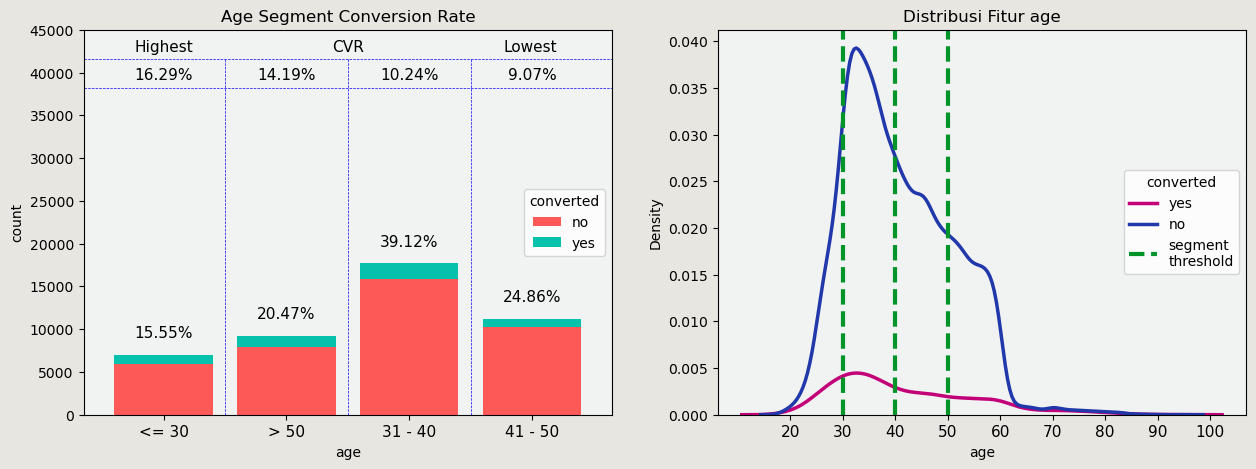

In [117]:
def percentage_above_bar_relative_to_xgroup(ax):
    for bars in ax.containers:
        for i, p in enumerate(bars):            
            if p.get_y() == 0:
                ax.annotate(f"{df_age['percentage_conv'][i]}%", (p.get_x() + 0.4, ax.get_ylim()[1] - 6200),\
                            size=11, ha='center', va='bottom')
                if i != len(bars) - 1:
                    plt.axvline(x = p.get_x() + 0.9, color = 'blue', ls = '--', lw = 0.5,\
                                ymax = 41600 / ax.get_ylim()[1] , ymin = 0)
            else:
                ax.text(p.get_x() + 0.16, p.get_height() + p.get_y() + 2000, f"{df_age['percentage_segment'][i]}%",\
                        fontsize=11,color='black')

df_age = df.groupby([pd.cut(x = df['age'], bins = [0, 30, 40, 50 ,95]), 'y']).count()\
                .rename(columns = {'age' : 'count'}).reset_index().rename(columns = {'y' : 'converted'})\
                [['age', 'converted', 'count']]
df_age['age'] = df_age['age'].apply(lambda x : '<= 30' if str(x) == '(0, 30]' else '31 - 40'\
                                    if str(x) == '(30, 40]' else '41 - 50'\
                                    if str(x) == '(40, 50]' else '> 50')
df_age = df_age.pivot_table(df_age, index = ['age'], columns = ['converted']).reset_index()
df_age.columns = ['age', 'no', 'yes']
df_age['percentage_conv'] = round(df_age['yes'] / (df_age['yes'] + df_age['no']) * 100, 2)
df_age['percentage_segment'] = round((df_age['no'] + df_age['yes']) / (df_age['no'].sum() + df_age['yes'].sum()) * 100, 2)
df_age = df_age.sort_values(by = ['percentage_conv'], ascending = False).set_index(['age'])

fig = plt.figure(figsize = (15, 5), facecolor = '#e8e6e1')
ax = df_age[df_age.columns[~df_age.columns.isin\
        (df_age.columns[df_age.columns.str.contains('^percentage')])]]\
        .plot(kind = 'bar', stacked = True, ax = fig.add_subplot(1, 2, 1, facecolor = '#f1f2f2'),
              color = ['#fd5956', '#06c2ac'], edgecolor = 'none', width = 0.8)
ax.set_ylim(top = 45000)
plt.xticks(fontsize = 11, rotation = 0)
plt.ylabel('count')
plt.axhline(y = ax.get_ylim()[1] - 6800, color = 'blue', ls = '--', lw = 0.5)
plt.axhline(y = ax.get_ylim()[1] - 3400, color = 'blue', ls = '--', lw = 0.5)
ax.text(1.37, 42500, "CVR", fontsize=11,color='black')
ax.text(-0.24, 42500, "Highest", fontsize=11,color='black')
ax.text(2.77, 42500, "Lowest", fontsize=11,color='black')
plt.title('Age Segment Conversion Rate')
plt.legend(title = 'converted', loc = 'center right')
percentage_above_bar_relative_to_xgroup(ax)

ax = sns.kdeplot(x = df['age'], hue = df['y'], ax = fig.add_subplot(1, 2, 2, facecolor = '#f1f2f2'),\
                 lw = 2.5, palette = ['#2138ab', '#c20078'])
ax.set_xticks(list(np.arange(20, 101, 10)))
plt.xticks(fontsize = 11, rotation = 0)
plt.axvline(x = 30, color = '#019529', ls = '--', lw = 3)
plt.axvline(x = 40, color = '#019529', ls = '--', lw = 3)
plt.axvline(x = 50, color = '#019529', ls = '--', lw = 3)
plt.legend(title = 'converted', loc = 'center right', labels = ['yes', 'no', 'segment\nthreshold'])
plt.title('Distribusi Fitur age')

Text(0.5, 0, 'duration (minute)')

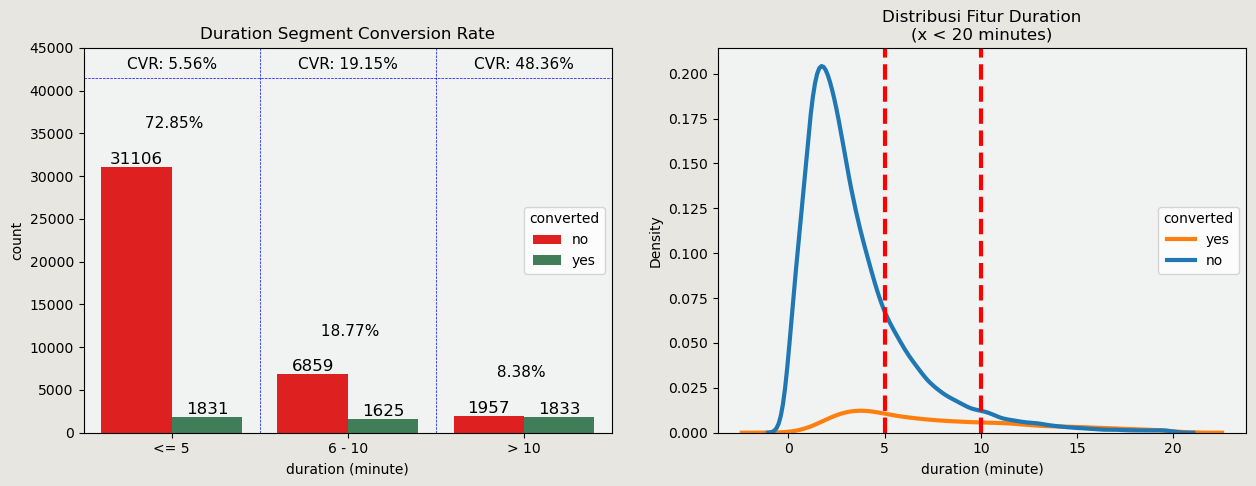

In [385]:
def percentduration_above_bar_relative_to_xgroup(ax):
    all_heights = [[p.get_height() for p in bars] for bars in ax.containers]
    for bars in ax.containers:
        for i, p in enumerate(bars):
            total = sum(xgroup[i] for xgroup in all_heights)
            percentage = f'CVR: {(100 * p.get_height() / total) :.2f}%'
            if round(p.get_x(), 2) in list(np.arange(-0.0, 3.0, 1.0)):
                ax.annotate(percentage, (p.get_x(), ax.get_ylim()[1] - 2800), size=11, ha='center', va='bottom')
                plt.axvline(x = p.get_x() + 0.5, color = 'blue', ls = '--', lw = 0.5)

def barplot_values_percent(ax):
    for i, p in enumerate(ax.patches):
        if i < len(df_duration.groupby(['duration'])['percentage'].mean()):
            x = p.get_x() + 0.22
            height = (p.get_height()) + 4500
            value = f"{(df_duration.groupby(['duration'])['percentage'].mean()[i]) : .2f}%"
            ax.text(x, height, value, fontsize=11,color='black')
            
df_duration = df.groupby([pd.cut(x = df['duration']/60, bins = [-1, 5, 10, 82]), 'y']).count()\
                .rename(columns = {'duration' : 'count'}).reset_index().rename(columns = {'y' : 'converted'})\
                [['duration', 'converted', 'count']]
df_duration['duration'] = df_duration['duration'].apply(lambda x : '<= 5' if str(x) == '(-1, 5]' else '6 - 10'\
                                    if str(x) == '(5, 10]' else '> 10')
df_duration = df_duration.merge(df_duration.groupby(['duration']).sum().reset_index(), on = 'duration')\
                .rename(columns = {'count_x' : 'count', 'count_y' : 'sub_total'})
df_duration['percentage'] = df_duration['sub_total'].apply(lambda x : round(x / df_duration['count'].sum() * 100, 2))
df_duration

fig = plt.figure(figsize = (15, 5), facecolor = '#e8e6e1')
ax = sns.barplot(x = df_duration['duration'], y = df_duration['count'], hue = df_duration['converted'], estimator = sum, ax = fig.add_subplot(1,2, 1, facecolor = '#f1f2f2'), palette = ['#ff0000', '#358856'])
for i in range(len(ax.containers)):
    ax.bar_label(ax.containers[i], fontsize = 12)
ax.set_ylim(top = 45000)
plt.axhline(y = ax.get_ylim()[1] - 3500, color = 'blue', ls = '--', lw = 0.5)
plt.title('Duration Segment Conversion Rate')
plt.xlabel(xlabel = 'duration (minute)')
plt.legend(title = 'converted', loc = 'center right')
percentduration_above_bar_relative_to_xgroup(ax)
barplot_values_percent(ax)

sns.kdeplot(x = df[df['duration']/60 < 20]['duration']/60, hue = df['y'], ax = fig.add_subplot(1, 2, 2, facecolor = '#f1f2f2'), lw = 3)
plt.axvline(x = 5, color = 'red', ls = '--', lw = 3)
plt.axvline(x = 10, color = 'red', ls = '--', lw = 3)
plt.legend(title = 'converted', loc = 'center right', labels = ['yes', 'no'])
plt.title('Distribusi Fitur Duration\n(x < 20 minutes)')
plt.xlabel(xlabel = 'duration (minute)')

Text(0.5, 0, 'duration (minute)')

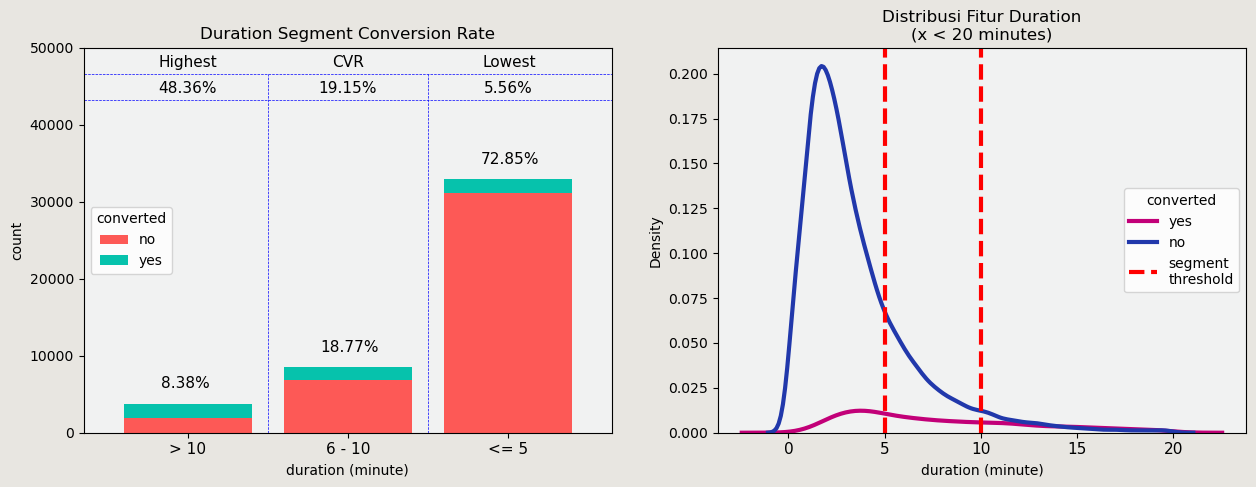

In [71]:
def percentage_above_bar_relative_to_xgroup(ax):
    for bars in ax.containers:
        for i, p in enumerate(bars):            
            if p.get_y() == 0:
                ax.annotate(f"{df_duration['percentage_conv'][i]}%", (p.get_x() + 0.4, ax.get_ylim()[1] - 6300),\
                            size=11, ha='center', va='bottom')
                if i != len(bars) - 1:
                    plt.axvline(x = p.get_x() + 0.9, color = 'blue', ls = '--', lw = 0.5,\
                                ymax = 46600 / ax.get_ylim()[1] , ymin = 0)
            else:
                ax.text(p.get_x() + 0.23, p.get_height() + p.get_y() + 2000, f"{df_duration['percentage_segment'][i]}%",\
                        fontsize=11,color='black')

df_duration = df.groupby([pd.cut(x = df['duration']/60, bins = [-1, 5, 10, 82]), 'y']).count()\
                .rename(columns = {'duration' : 'count'}).reset_index().rename(columns = {'y' : 'converted'})\
                [['duration', 'converted', 'count']]
df_duration['duration'] = df_duration['duration'].apply(lambda x : '<= 5' if str(x) == '(-1, 5]' else '6 - 10'\
                                    if str(x) == '(5, 10]' else '> 10')
df_duration = df_duration.pivot_table(df_duration, index = ['duration'], columns = ['converted']).reset_index()
df_duration.columns = ['duration', 'no', 'yes']
df_duration['percentage_conv'] = round(df_duration['yes'] / (df_duration['yes'] + df_duration['no']) * 100, 2)
df_duration['percentage_segment'] = round((df_duration['no'] + df_duration['yes']) /\
                                          (df_duration['no'].sum() + df_duration['yes'].sum()) * 100, 2)
df_duration = df_duration.sort_values(by = ['percentage_conv'], ascending = False).set_index(['duration'])

fig = plt.figure(figsize = (15, 5), facecolor = '#e8e6e1')
ax = df_duration[df_duration.columns[~df_duration.columns.isin(df_duration.columns\
                                                               [df_duration.columns.str.contains('^percentage')])]]\
        .plot(kind = 'bar', stacked = True, ax = fig.add_subplot(1, 2, 1, facecolor = '#f1f2f2'),
              color = ['#fd5956', '#06c2ac'], edgecolor = 'none', width = 0.8)
ax.set_ylim(top = 50000)
plt.xticks(fontsize = 11, rotation = 0)
plt.ylabel('count')
plt.axhline(y = ax.get_ylim()[1] - 6800, color = 'blue', ls = '--', lw = 0.5)
plt.axhline(y = ax.get_ylim()[1] - 3400, color = 'blue', ls = '--', lw = 0.5)
ax.text(0.9, 47500, "CVR", fontsize=11,color='black')
ax.text(-0.18, 47500, "Highest", fontsize=11,color='black')
ax.text(1.84, 47500, "Lowest", fontsize=11,color='black')
plt.title('Duration Segment Conversion Rate')
plt.xlabel(xlabel = 'duration (minute)')
plt.legend(title = 'converted', loc = 'center left')
percentage_above_bar_relative_to_xgroup(ax)
# barplot_values_percent(ax)

ax = sns.kdeplot(x = df[df['duration']/60 < 20]['duration']/60, hue = df['y'],\
                 ax = fig.add_subplot(1, 2, 2, facecolor = '#f1f2f2'), lw = 3, palette = ['#2138ab', '#c20078'])
ax.set_xticks(list(np.arange(0, 21, 5)))
plt.xticks(fontsize = 11, rotation = 0)
plt.axvline(x = 5, color = 'red', ls = '--', lw = 3)
plt.axvline(x = 10, color = 'red', ls = '--', lw = 3)
plt.legend(title = 'converted', loc = 'center right', labels = ['yes', 'no', 'segment\nthreshold'])
plt.title('Distribusi Fitur Duration\n(x < 20 minutes)')
plt.xlabel(xlabel = 'duration (minute)')

In [37]:
max(df['duration']/60)

81.96666666666667

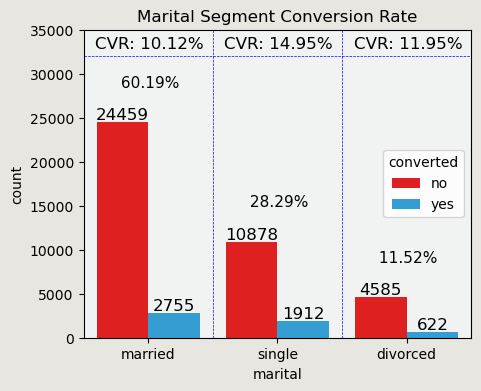

In [395]:
def barplot_values_percent(ax):
    for i, p in enumerate(ax.patches):
        if i < len(df_marital[df_marital['converted'] == 'no'].sort_values(by = ['count'], ascending = [False]).reset_index(drop = True)['percentage']):
            x = p.get_x() + 0.15
            height = (p.get_height()) + 4000
            value = f"{(df_marital[df_marital['converted'] == 'no'].sort_values(by = ['count'], ascending = [False]).reset_index(drop = True)['percentage'][i]) : .2f}%"
            ax.text(x, height, value, fontsize=11,color='black')

df_marital = df.groupby(['marital', 'y']).count().reset_index()[['marital', 'y', 'campaign']]
df_marital.columns = ['marital', 'converted', 'count']
df_marital = df_marital.merge(df_marital.groupby(['marital']).sum().reset_index(), on = 'marital')\
                .rename(columns = {'count_x' : 'count', 'count_y' : 'sub_total'})
df_marital['percentage'] = df_marital['sub_total'].apply(lambda x : round(x / df_marital['count'].sum() * 100, 2))
df_marital = df_marital.sort_values(by = ['count'], ascending = [False])

percentage = [f"{(df[(df['marital'] == list(df['marital'].unique())[i]) & (df['y'] == 'yes')]['marital'].count() / ((df[(df['marital'] == list(df['marital'].unique())[i]) & (df['y'] == 'yes')]['marital'].count()) + (df[(df['marital'] == list(df['marital'].unique())[i]) & (df['y'] == 'no')]['marital'].count())) * 100) : .2f}%".lstrip() for i in range(len(list(df['marital'].unique())))]
fig = plt.figure(figsize = (5, 4), facecolor = '#e8e6e1')
ax = sns.countplot(x = df['marital'], hue = df['y'], ax = fig.add_subplot(1, 1, 1, facecolor = '#f1f2f2'), palette = ['#ff0000', '#1aa7ec'])
for i in range(len(ax.containers)):
    ax.bar_label(ax.containers[i], fontsize = 12)
ax.set_ylim(top = 35000)
plt.title('Marital Segment Conversion Rate')
loc = [[p.get_x() for p in bars] for bars in ax.containers]
for i in range(len(df['marital'].unique())):
    ax.text(loc[0][i] - 0.01, ax.get_ylim()[1] - 2100, f"CVR: {percentage[i]}", fontsize = 12)
    plt.axvline(x = loc[0][i]-0.1, color = 'blue', ls = '--', lw = 0.5)
plt.axhline(y = ax.get_ylim()[1] - 3000, color = 'blue', ls = '--', lw = 0.5)
plt.legend(title = 'converted', loc = 'center right')
barplot_values_percent(ax)

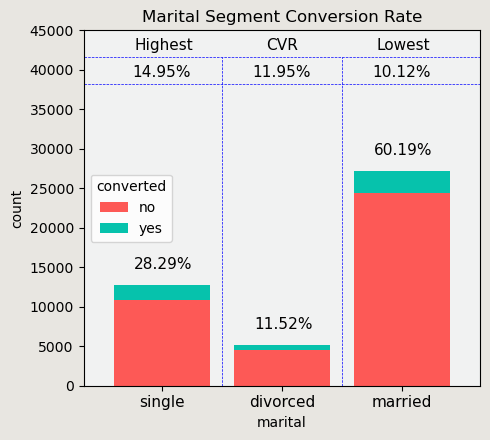

In [70]:
def percentage_above_bar_relative_to_xgroup(ax):
    for bars in ax.containers:
        for i, p in enumerate(bars):            
            if p.get_y() == 0:
                ax.annotate(f"{df_marital['percentage_conv'][i]}%", (p.get_x() + 0.4, ax.get_ylim()[1] - 6300),\
                            size=11, ha='center', va='bottom')
                if i != len(bars) - 1:
                    plt.axvline(x = p.get_x() + 0.9, color = 'blue', ls = '--', lw = 0.5,\
                                ymax = 41600 / ax.get_ylim()[1] , ymin = 0)
            else:
                ax.text(p.get_x() + 0.17, p.get_height() + p.get_y() + 2000, f"{df_marital['percentage_segment'][i]}%",\
                        fontsize=11,color='black')

df_marital = df.groupby(['marital', 'y']).count().reset_index()[['marital', 'y', 'campaign']]
df_marital.columns = ['marital', 'converted', 'count']
df_marital = df_marital.pivot_table(df_marital, index = ['marital'], columns = ['converted']).reset_index()
df_marital.columns = ['marital', 'no', 'yes']
df_marital['percentage_conv'] = round(df_marital['yes'] / (df_marital['yes'] + df_marital['no']) * 100, 2)
df_marital['percentage_segment'] = round((df_marital['no'] + df_marital['yes']) /\
                                          (df_marital['no'].sum() + df_marital['yes'].sum()) * 100, 2)
df_marital = df_marital.sort_values(by = ['percentage_conv'], ascending = False).set_index(['marital'])

fig = plt.figure(figsize = (5, 4.5), facecolor = '#e8e6e1')
ax = df_marital[df_marital.columns[~df_marital.columns.isin\
                                   (df_marital.columns[df_marital.columns.str.contains('^percentage')])]]\
                .plot(kind = 'bar', stacked = True, ax = fig.add_subplot(1, 1, 1, facecolor = '#f1f2f2'),
                  color = ['#fd5956', '#06c2ac'], edgecolor = 'none', width = 0.8)
ax.set_ylim(top = 45000)
plt.xticks(fontsize = 11, rotation = 0)
plt.ylabel('count')
plt.axhline(y = ax.get_ylim()[1] - 6800, color = 'blue', ls = '--', lw = 0.5)
plt.axhline(y = ax.get_ylim()[1] - 3400, color = 'blue', ls = '--', lw = 0.5)
ax.text(0.87, 42550, "CVR", fontsize=11,color='black')
ax.text(-0.23, 42550, "Highest", fontsize=11,color='black')
ax.text(1.79, 42550, "Lowest", fontsize=11,color='black')
plt.title('Marital Segment Conversion Rate')
plt.legend(title = 'converted', loc = 'center left')
percentage_above_bar_relative_to_xgroup(ax)
plt.tight_layout()

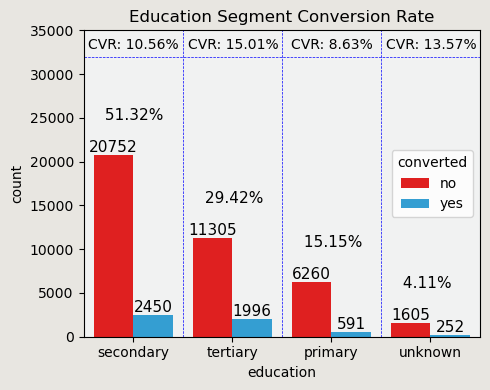

In [65]:
def percentage_above_bar_relative_to_xgroup(ax):
    all_heights = [[p.get_height() for p in bars] for bars in ax.containers]
    for bars in ax.containers:
        for i, p in enumerate(bars):
            total = sum(xgroup[i] for xgroup in all_heights)
            percentage = f'{(100 * p.get_height() / total) :.2f}%'
            if round(p.get_x(), 2) in list(np.arange(-0.0, 4.0, 1.0)): 
                ax.annotate(f"CVR: {percentage}", (p.get_x() + 0.006, ax.get_ylim()[1] - 2500), size=10, ha='center', va='bottom')
                plt.axvline(x = p.get_x() + 0.5, color = 'blue', ls = '--', lw = 0.5)

def barplot_values_percent(ax):
    for i, p in enumerate(ax.patches):
        if i < len(df_education[df_education['converted'] == 'no'].sort_values(by = ['count'], ascending = [False]).reset_index(drop = True)['percentage']):
            x = p.get_x() + 0.07
            height = (p.get_height()) + 4000
            value = f"{(df_education[df_education['converted'] == 'no'].sort_values(by = ['count'], ascending = [False]).reset_index(drop = True)['percentage'][i]) : .2f}%"
            ax.text(x, height, value, fontsize=11,color='black')

df_education = df.groupby(['education', 'y']).count().reset_index()[['education', 'y', 'campaign']]
df_education.columns = ['education', 'converted', 'count']
df_education = df_education.merge(df_education.groupby(['education']).sum().reset_index(), on = 'education')\
                .rename(columns = {'count_x' : 'count', 'count_y' : 'sub_total'})
df_education['percentage'] = df_education['sub_total'].apply(lambda x : round(x / df_education['count'].sum() * 100, 2))
df_education = df_education.sort_values(by = ['count'], ascending = [False])

fig = plt.figure(figsize = (5, 4), facecolor = '#e8e6e1')
ax = sns.barplot(x = df_education['education'], y = df_education['count'], hue = df_education['converted'], estimator = sum, ax = fig.add_subplot(1,1, 1, facecolor = '#f1f2f2'), palette = ['#ff0000', '#1aa7ec'])
for i in range(len(ax.containers)):
    ax.bar_label(ax.containers[i], fontsize = 11)
ax.set_ylim(top = 35000)
plt.axhline(y = ax.get_ylim()[1] - 3000, color = 'blue', ls = '--', lw = 0.5)
# plt.xticks(rotation = 25)
plt.title('Education Segment Conversion Rate')
plt.legend(title = 'converted', loc = 'center right')
percentage_above_bar_relative_to_xgroup(ax)
barplot_values_percent(ax)
plt.tight_layout()

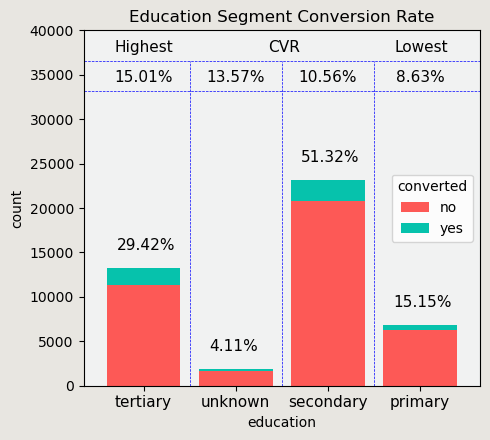

In [69]:
def percentage_above_bar_relative_to_xgroup(ax):
    for bars in ax.containers:
        for i, p in enumerate(bars):            
            if p.get_y() == 0:
                ax.annotate(f"{df_education['percentage_conv'][i]}%", (p.get_x() + 0.4, ax.get_ylim()[1] - 6100),\
                            size=11, ha='center', va='bottom')
                if i != len(bars) - 1:
                    plt.axvline(x = p.get_x() + 0.9, color = 'blue', ls = '--', lw = 0.5,\
                                ymax = 36600 / ax.get_ylim()[1] , ymin = 0)
            else:
                ax.text(p.get_x() + 0.11, p.get_height() + p.get_y() + 2000, f"{df_education['percentage_segment'][i]}%",\
                        fontsize=11,color='black')

df_education = df.groupby(['education', 'y']).count().reset_index()[['education', 'y', 'campaign']]
df_education.columns = ['education', 'converted', 'count']
df_education = df_education.pivot_table(df_education, index = ['education'], columns = ['converted']).reset_index()
df_education.columns = ['education', 'no', 'yes']
df_education['percentage_conv'] = round(df_education['yes'] / (df_education['yes'] + df_education['no']) * 100, 2)
df_education['percentage_segment'] = round((df_education['no'] + df_education['yes']) /\
                                          (df_education['no'].sum() + df_education['yes'].sum()) * 100, 2)
df_education = df_education.sort_values(by = ['percentage_conv'], ascending = False).set_index(['education'])

fig = plt.figure(figsize = (5, 4.5), facecolor = '#e8e6e1')
ax = df_education[df_education.columns[~df_education.columns.isin\
                                   (df_education.columns[df_education.columns.str.contains('^percentage')])]]\
                .plot(kind = 'bar', stacked = True, ax = fig.add_subplot(1, 1, 1, facecolor = '#f1f2f2'),
                  color = ['#fd5956', '#06c2ac'], edgecolor = 'none', width = 0.8)
ax.set_ylim(top = 40000)
plt.xticks(fontsize = 11, rotation = 0)
plt.ylabel('count')
plt.axhline(y = ax.get_ylim()[1] - 6800, color = 'blue', ls = '--', lw = 0.5)
plt.axhline(y = ax.get_ylim()[1] - 3400, color = 'blue', ls = '--', lw = 0.5)
ax.text(1.35, 37600, "CVR", fontsize=11,color='black')
ax.text(-0.31, 37600, "Highest", fontsize=11,color='black')
ax.text(2.72, 37600, "Lowest", fontsize=11,color='black')
plt.title('Education Segment Conversion Rate')
plt.legend(title = 'converted', loc = 'center right')
percentage_above_bar_relative_to_xgroup(ax)
plt.tight_layout()

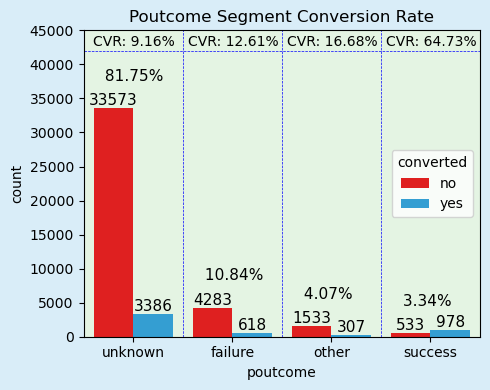

In [113]:
def percentage_above_bar_relative_to_xgroup(ax):
    all_heights = [[p.get_height() for p in bars] for bars in ax.containers]
    for bars in ax.containers:
        for i, p in enumerate(bars):
            total = sum(xgroup[i] for xgroup in all_heights)
            percentage = f'{(100 * p.get_height() / total) :.2f}%'
            if round(p.get_x(), 2) in list(np.arange(-0.0, 4.0, 1.0)): 
                ax.annotate(f"CVR: {percentage}", (p.get_x() + 0.006, ax.get_ylim()[1] - 2750), size=10, ha='center', va='bottom')
                plt.axvline(x = p.get_x() + 0.5, color = 'blue', ls = '--', lw = 0.5)

def barplot_values_percent(ax):
    for i, p in enumerate(ax.patches):
        if i < len(df_poutcome[df_poutcome['converted'] == 'no'].sort_values(by = ['count'], ascending = [False]).reset_index(drop = True)['percentage']):
            x = p.get_x() + 0.07
            height = (p.get_height()) + 4000
            value = f"{(df_poutcome[df_poutcome['converted'] == 'no'].sort_values(by = ['count'], ascending = [False]).reset_index(drop = True)['percentage'][i]) : .2f}%"
            ax.text(x, height, value, fontsize=11,color='black')

df_poutcome = df.groupby(['poutcome', 'y']).count().reset_index()[['poutcome', 'y', 'campaign']]
df_poutcome.columns = ['poutcome', 'converted', 'count']
df_poutcome = df_poutcome.merge(df_poutcome.groupby(['poutcome']).sum().reset_index(), on = 'poutcome')\
                .rename(columns = {'count_x' : 'count', 'count_y' : 'sub_total'})
df_poutcome['percentage'] = df_poutcome['sub_total'].apply(lambda x : round(x / df_poutcome['count'].sum() * 100, 2))
df_poutcome = df_poutcome.sort_values(by = ['count'], ascending = [False])

fig = plt.figure(figsize = (5, 4), facecolor = '#d9edf8')
ax = sns.barplot(x = df_poutcome['poutcome'], y = df_poutcome['count'], hue = df_poutcome['converted'], estimator = sum, ax = fig.add_subplot(1,1, 1, facecolor = '#e4f4e3'), palette = ['#ff0000', '#1aa7ec'])
for i in range(len(ax.containers)):
    ax.bar_label(ax.containers[i], fontsize = 11)
ax.set_ylim(top = 45000)
plt.axhline(y = ax.get_ylim()[1] - 3000, color = 'blue', ls = '--', lw = 0.5)
# plt.xticks(rotation = 25)
plt.title('Poutcome Segment Conversion Rate')
plt.legend(title = 'converted', loc = 'center right')
percentage_above_bar_relative_to_xgroup(ax)
barplot_values_percent(ax)
plt.tight_layout()

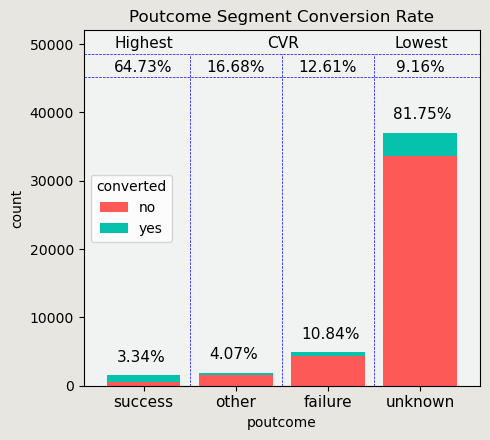

In [68]:
def percentage_above_bar_relative_to_xgroup(ax):
    for bars in ax.containers:
        for i, p in enumerate(bars):            
            if p.get_y() == 0:
                ax.annotate(f"{df_poutcome['percentage_conv'][i]}%", (p.get_x() + 0.4, ax.get_ylim()[1] - 6500),\
                            size=11, ha='center', va='bottom')
                if i != len(bars) - 1:
                    plt.axvline(x = p.get_x() + 0.9, color = 'blue', ls = '--', lw = 0.5,\
                                ymax = 48600 / ax.get_ylim()[1] , ymin = 0)
            else:
                ax.text(p.get_x() + 0.11, p.get_height() + p.get_y() + 2000, f"{df_poutcome['percentage_segment'][i]}%",\
                        fontsize=11,color='black')

df_poutcome = df.groupby(['poutcome', 'y']).count().reset_index()[['poutcome', 'y', 'campaign']]
df_poutcome.columns = ['poutcome', 'converted', 'count']
df_poutcome = df_poutcome.pivot_table(df_poutcome, index = ['poutcome'], columns = ['converted']).reset_index()
df_poutcome.columns = ['poutcome', 'no', 'yes']
df_poutcome['percentage_conv'] = round(df_poutcome['yes'] / (df_poutcome['yes'] + df_poutcome['no']) * 100, 2)
df_poutcome['percentage_segment'] = round((df_poutcome['no'] + df_poutcome['yes']) /\
                                          (df_poutcome['no'].sum() + df_poutcome['yes'].sum()) * 100, 2)
df_poutcome = df_poutcome.sort_values(by = ['percentage_conv'], ascending = False).set_index(['poutcome'])

fig = plt.figure(figsize = (5, 4.5), facecolor = '#e8e6e1')
ax = df_poutcome[df_poutcome.columns[~df_poutcome.columns.isin\
                                   (df_poutcome.columns[df_poutcome.columns.str.contains('^percentage')])]]\
                .plot(kind = 'bar', stacked = True, ax = fig.add_subplot(1, 1, 1, facecolor = '#f1f2f2'),
                  color = ['#fd5956', '#06c2ac'], edgecolor = 'none', width = 0.8)
ax.set_ylim(top = 52000)
plt.xticks(fontsize = 11, rotation = 0)
plt.ylabel('count')
plt.axhline(y = ax.get_ylim()[1] - 6800, color = 'blue', ls = '--', lw = 0.5)
plt.axhline(y = ax.get_ylim()[1] - 3400, color = 'blue', ls = '--', lw = 0.5)
ax.text(1.34, 49400, "CVR", fontsize=11,color='black')
ax.text(-0.31, 49400, "Highest", fontsize=11,color='black')
ax.text(2.72, 49400, "Lowest", fontsize=11,color='black')
plt.title('Poutcome Segment Conversion Rate')
plt.legend(title = 'converted', loc = 'center left')
percentage_above_bar_relative_to_xgroup(ax)
plt.tight_layout()

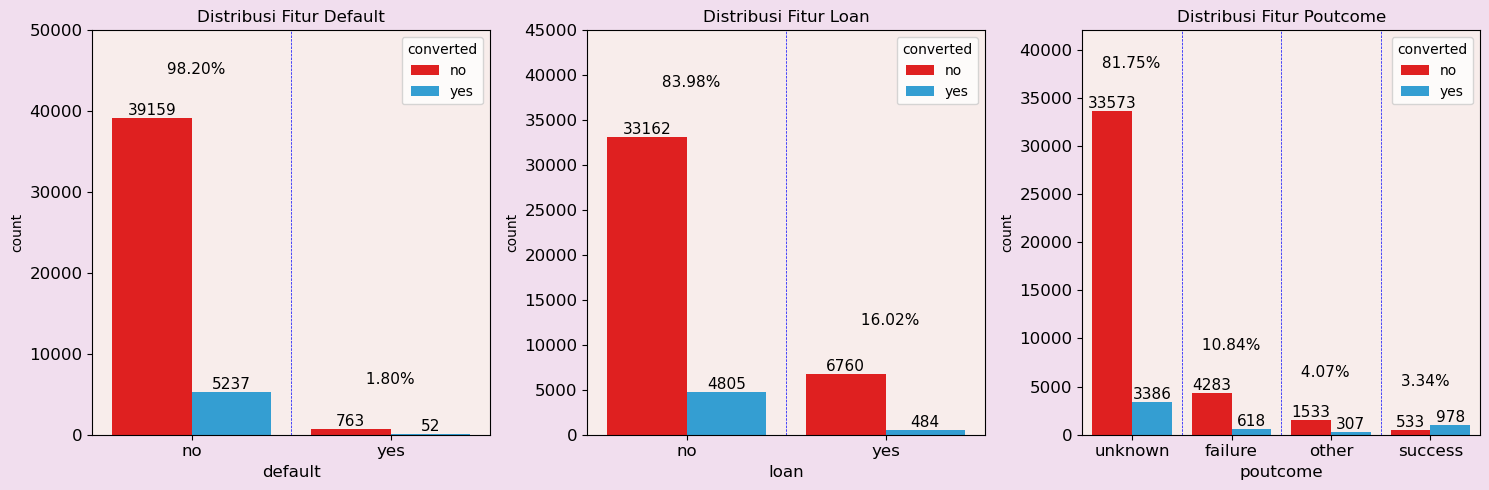

In [112]:
def line_separator(ax):
    for bars in ax.containers:
        for i, p in enumerate(bars):
            if round(p.get_x(), 2) in [-0.0]:
                plt.axvline(x = p.get_x() + 0.5, color = 'blue', ls = '--', lw = 0.5)

def line_separator_poutcome(ax):
    for bars in ax.containers:
        for i, p in enumerate(bars):
            if round(p.get_x(), 2) in list(np.arange(-0.0, 3.0, 1.0)):
                plt.axvline(x = p.get_x() + 0.5, color = 'blue', ls = '--', lw = 0.5)

def barplot_values_percent_default(ax):
    for i, p in enumerate(ax.patches):
        if i < len(df_default[df_default['converted'] == 'no'].sort_values(by = ['count'], ascending = [False]).reset_index(drop = True)['percentage']):
            x = p.get_x() + 0.25
            height = (p.get_height()) + 5500
            value = f"{(df_default[df_default['converted'] == 'no'].sort_values(by = ['count'], ascending = [False]).reset_index(drop = True)['percentage'][i]) : .2f}%"
            ax.text(x, height, value, fontsize=11,color='black')
            
def barplot_values_percent_loan(ax):
    for i, p in enumerate(ax.patches):
        if i < len(df_loan[df_loan['converted'] == 'no'].sort_values(by = ['count'], ascending = [False]).reset_index(drop = True)['percentage']):
            x = p.get_x() + 0.25
            height = (p.get_height()) + 5500
            value = f"{(df_loan[df_loan['converted'] == 'no'].sort_values(by = ['count'], ascending = [False]).reset_index(drop = True)['percentage'][i]) : .2f}%"
            ax.text(x, height, value, fontsize=11,color='black')
            
def barplot_values_percent_poutcome(ax):
    for i, p in enumerate(ax.patches):
        if i < len(df_poutcome[df_poutcome['converted'] == 'no'].sort_values(by = ['count'], ascending = [False]).reset_index(drop = True)['percentage']):
            x = p.get_x() + 0.05
            height = (p.get_height()) + 4500
            value = f"{(df_poutcome[df_poutcome['converted'] == 'no'].sort_values(by = ['count'], ascending = [False]).reset_index(drop = True)['percentage'][i]) : .2f}%"
            ax.text(x, height, value, fontsize=11,color='black')


fig = plt.figure(figsize=(15, 5), facecolor = '#f1deee')
df_default = df.groupby(['default', 'y']).count().reset_index()[['default', 'y', 'campaign']]
df_default.columns = ['default', 'converted', 'count']
df_default = df_default.merge(df_default.groupby(['default']).sum().reset_index(), on = 'default')\
                .rename(columns = {'count_x' : 'count', 'count_y' : 'sub_total'})
df_default['percentage'] = df_default['sub_total'].apply(lambda x : round(x / df_default['count'].sum() * 100, 2))
df_default = df_default.sort_values(by = ['count'], ascending = [False])

ax = sns.barplot(x = df_default['default'], y = df_default['count'], hue = df_default['converted'], estimator = sum, ax = fig.add_subplot(1,3, 1, facecolor = '#f8edeb'), palette = ['#ff0000', '#1aa7ec'])
for i in range(len(ax.containers)):
    ax.bar_label(ax.containers[i], fontsize = 11)
ax.set_ylim(top = 50000)
plt.title('Distribusi Fitur Default')
plt.legend(title = 'converted', loc = 'upper right')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel(xlabel = 'default', fontsize=12)
barplot_values_percent_default(ax)
line_separator(ax)

df_poutcome = df.groupby(['poutcome', 'y']).count().reset_index()[['poutcome', 'y', 'campaign']]
df_poutcome.columns = ['poutcome', 'converted', 'count']
df_poutcome = df_poutcome.merge(df_poutcome.groupby(['poutcome']).sum().reset_index(), on = 'poutcome')\
                .rename(columns = {'count_x' : 'count', 'count_y' : 'sub_total'})
df_poutcome['percentage'] = df_poutcome['sub_total'].apply(lambda x : round(x / df_poutcome['count'].sum() * 100, 2))
df_poutcome = df_poutcome.sort_values(by = ['count'], ascending = [False])

df_loan = df.groupby(['loan', 'y']).count().reset_index()[['loan', 'y', 'campaign']]
df_loan.columns = ['loan', 'converted', 'count']
df_loan = df_loan.merge(df_loan.groupby(['loan']).sum().reset_index(), on = 'loan')\
                .rename(columns = {'count_x' : 'count', 'count_y' : 'sub_total'})
df_loan['percentage'] = df_loan['sub_total'].apply(lambda x : round(x / df_loan['count'].sum() * 100, 2))
df_loan = df_loan.sort_values(by = ['count'], ascending = [False])

ax = sns.barplot(x = df_loan['loan'], y = df_loan['count'], hue = df_loan['converted'], estimator = sum, ax = fig.add_subplot(1,3, 2, facecolor = '#f8edeb'), palette = ['#ff0000', '#1aa7ec'])
for i in range(len(ax.containers)):
    ax.bar_label(ax.containers[i], fontsize = 11)
ax.set_ylim(top = 45000)
plt.title('Distribusi Fitur Loan')
plt.legend(title = 'converted', loc = 'upper right')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel(xlabel = 'loan', fontsize=12)
barplot_values_percent_loan(ax)
line_separator(ax)

df_poutcome = df.groupby(['poutcome', 'y']).count().reset_index()[['poutcome', 'y', 'campaign']]
df_poutcome.columns = ['poutcome', 'converted', 'count']
df_poutcome = df_poutcome.merge(df_poutcome.groupby(['poutcome']).sum().reset_index(), on = 'poutcome')\
                .rename(columns = {'count_x' : 'count', 'count_y' : 'sub_total'})
df_poutcome['percentage'] = df_poutcome['sub_total'].apply(lambda x : round(x / df_poutcome['count'].sum() * 100, 2))
df_poutcome = df_poutcome.sort_values(by = ['count'], ascending = [False])

ax = sns.barplot(x = df_poutcome['poutcome'], y = df_poutcome['count'], hue = df_poutcome['converted'], estimator = sum, ax = fig.add_subplot(1,3, 3, facecolor = '#f8edeb'), palette = ['#ff0000', '#1aa7ec'])
for i in range(len(ax.containers)):
    ax.bar_label(ax.containers[i], fontsize = 11)
ax.set_ylim(top = 42000)
plt.title('Distribusi Fitur Poutcome')
plt.legend(title = 'converted', loc = 'upper right')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel(xlabel = 'poutcome', fontsize=12)
barplot_values_percent_poutcome(ax)
line_separator_poutcome(ax)

plt.tight_layout()

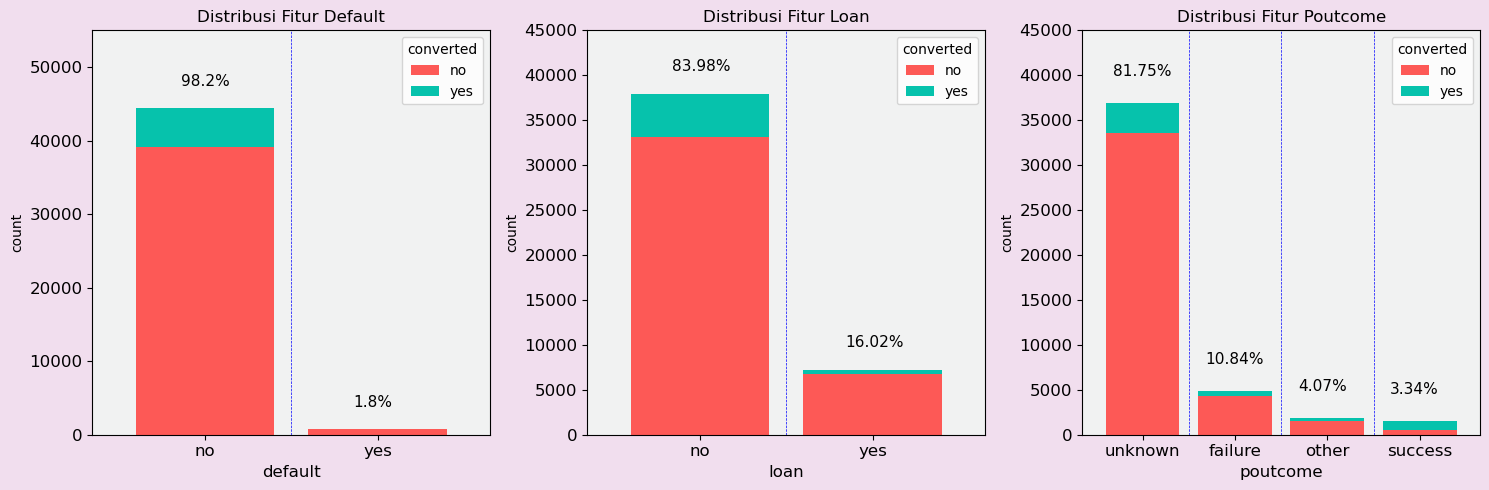

In [608]:
def line_separator(ax):
    for bars in ax.containers:
        for i, p in enumerate(bars):
            if (p.get_y() == 0) and (i < 1):
                plt.axvline(x = p.get_x() + 0.9, color = 'blue', ls = '--', lw = 0.5)

def line_separator_poutcome(ax):
    for bars in ax.containers:
        for i, p in enumerate(bars):
            if (p.get_y() == 0) and (i < 3):
                plt.axvline(x = p.get_x() + 0.9, color = 'blue', ls = '--', lw = 0.5)

def barplot_values_percent_default(ax):
    for i, p in enumerate(ax.patches):
        if (i < 2 * len(df_default['percentage_segment'])) and (int(p.get_y()) != 0):
            x = p.get_x() + 0.26
            height = p.get_height() + p.get_y() + 3000
            value = f"{df_default['percentage_segment'][i - (2 * len(df_default['percentage_segment']))]}%"
            ax.text(x, height, value, fontsize=11,color='black')

def barplot_values_percent_loan(ax):
    for i, p in enumerate(ax.patches):
        if (i < 2 * len(df_loan['percentage_segment'])) and (int(p.get_y()) != 0):
            x = p.get_x() + 0.24
            height = p.get_height() + p.get_y() + 2500
            value = f"{df_loan['percentage_segment'][i - (2 * len(df_loan['percentage_segment']))]}%"
            ax.text(x, height, value, fontsize=11,color='black')
            
def barplot_values_percent_poutcome(ax):
    for i, p in enumerate(ax.patches):
        if (i < 2 * len(df_poutcome['percentage_segment'])) and (int(p.get_y()) != 0):
            x = p.get_x() + 0.08
            height = p.get_height() + p.get_y() + 3000
            value = f"{df_poutcome['percentage_segment'][i - (2 * len(df_poutcome['percentage_segment']))]}%"
            ax.text(x, height, value, fontsize=11,color='black')

fig = plt.figure(figsize=(15, 5), facecolor = '#f1deee')
df_default = df.groupby(['default', 'y']).count().reset_index()[['default', 'y', 'campaign']]
df_default.columns = ['default', 'converted', 'count']
df_default = df_default.pivot_table(df_default, index = ['default'], columns = ['converted']).reset_index()
df_default.columns = ['default', 'no', 'yes']
df_default['percentage_conv'] = round(df_default['yes'] / (df_default['yes'] + df_default['no']) * 100, 2)
df_default['percentage_segment'] = round((df_default['no'] + df_default['yes']) /\
                                          (df_default['no'].sum() + df_default['yes'].sum()) * 100, 2)
df_default = df_default.sort_values(by = ['percentage_segment'], ascending = False).set_index(['default'])

ax = df_default[df_default.columns[~df_default.columns.isin\
                                   (df_default.columns[df_default.columns.str.contains('^percentage')])]]\
                .plot(kind = 'bar', stacked = True, ax = fig.add_subplot(1, 3, 1, facecolor = '#f1f2f2'),
                  color = ['#fd5956', '#06c2ac'], edgecolor = 'none', width = 0.8)
ax.set_ylim(top = 55000)
plt.title('Distribusi Fitur Default')
plt.legend(title = 'converted', loc = 'upper right')
plt.xticks(fontsize=12, rotation = 0)
plt.ylabel('count')
plt.yticks(fontsize=12)
plt.xlabel(xlabel = 'default', fontsize=12)
barplot_values_percent_default(ax)
line_separator(ax)

df_loan = df.groupby(['loan', 'y']).count().reset_index()[['loan', 'y', 'campaign']]
df_loan.columns = ['loan', 'converted', 'count']
df_loan = df_loan.pivot_table(df_loan, index = ['loan'], columns = ['converted']).reset_index()
df_loan.columns = ['loan', 'no', 'yes']
df_loan['percentage_conv'] = round(df_loan['yes'] / (df_loan['yes'] + df_loan['no']) * 100, 2)
df_loan['percentage_segment'] = round((df_loan['no'] + df_loan['yes']) /\
                                          (df_loan['no'].sum() + df_loan['yes'].sum()) * 100, 2)
df_loan = df_loan.sort_values(by = ['percentage_segment'], ascending = False).set_index(['loan'])

ax = df_loan[df_loan.columns[~df_loan.columns.isin\
                                   (df_loan.columns[df_loan.columns.str.contains('^percentage')])]]\
                .plot(kind = 'bar', stacked = True, ax = fig.add_subplot(1, 3, 2, facecolor = '#f1f2f2'),
                  color = ['#fd5956', '#06c2ac'], edgecolor = 'none', width = 0.8)
ax.set_ylim(top = 45000)
plt.title('Distribusi Fitur Loan')
plt.legend(title = 'converted', loc = 'upper right')
plt.xticks(fontsize=12, rotation = 0)
plt.ylabel('count')
plt.yticks(fontsize=12)
plt.xlabel(xlabel = 'loan', fontsize=12)
barplot_values_percent_loan(ax)
line_separator(ax)

df_poutcome = df.groupby(['poutcome', 'y']).count().reset_index()[['poutcome', 'y', 'campaign']]
df_poutcome.columns = ['poutcome', 'converted', 'count']
df_poutcome = df_poutcome.pivot_table(df_poutcome, index = ['poutcome'], columns = ['converted']).reset_index()
df_poutcome.columns = ['poutcome', 'no', 'yes']
df_poutcome['percentage_conv'] = round(df_poutcome['yes'] / (df_poutcome['yes'] + df_poutcome['no']) * 100, 2)
df_poutcome['percentage_segment'] = round((df_poutcome['no'] + df_poutcome['yes']) /\
                                          (df_poutcome['no'].sum() + df_poutcome['yes'].sum()) * 100, 2)
df_poutcome = df_poutcome.sort_values(by = ['percentage_segment'], ascending = False).set_index(['poutcome'])

ax = df_poutcome[df_poutcome.columns[~df_poutcome.columns.isin\
                                   (df_poutcome.columns[df_poutcome.columns.str.contains('^percentage')])]]\
                .plot(kind = 'bar', stacked = True, ax = fig.add_subplot(1, 3, 3, facecolor = '#f1f2f2'),
                  color = ['#fd5956', '#06c2ac'], edgecolor = 'none', width = 0.8)
ax.set_ylim(top = 45000)
plt.title('Distribusi Fitur Poutcome')
plt.legend(title = 'converted', loc = 'upper right')
plt.xticks(fontsize=12, rotation = 0)
plt.ylabel('count')
plt.yticks(fontsize=12)
plt.xlabel(xlabel = 'poutcome', fontsize=12)
barplot_values_percent_poutcome(ax)
line_separator_poutcome(ax)

plt.tight_layout()

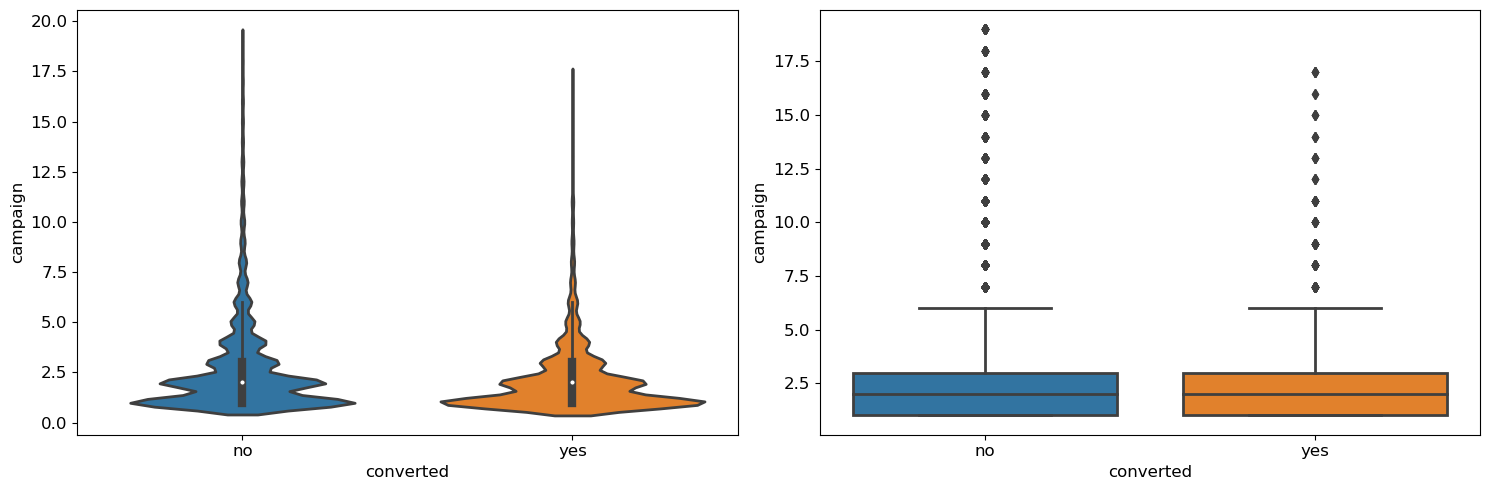

In [120]:
nums = df.select_dtypes(include = ['int64', 'float64']).columns
fig = plt.figure(figsize=(15, 5))
sns.violinplot(y = df[df['campaign'] < 20]['campaign'], x = df['y'], ax = fig.add_subplot(1,2, 1), linewidth = 2)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.ylabel(ylabel = 'campaign', fontsize=12)
plt.xlabel(xlabel = 'converted', fontsize=12)
plt.tight_layout()

sns.boxplot(y = df[df['campaign'] < 20]['campaign'], x = df['y'], ax = fig.add_subplot(1,2, 2), linewidth = 2)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.ylabel(ylabel = 'campaign', fontsize=12)
plt.xlabel(xlabel = 'converted', fontsize=12)
plt.tight_layout()

Text(0.5, 1.0, 'Distribusi Fitur Campaign\n(x < 10)')

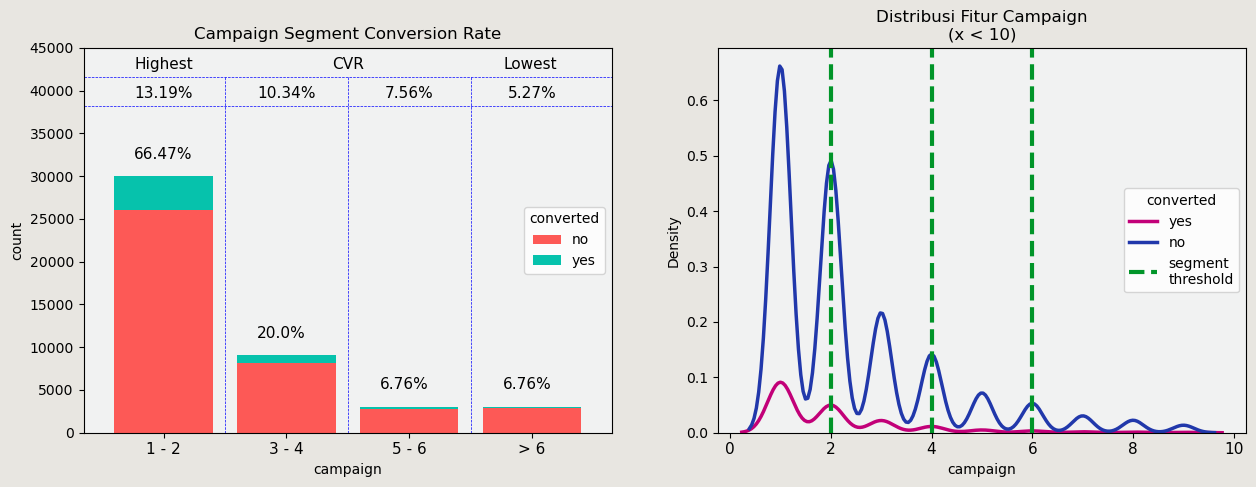

In [94]:
def percentage_above_bar_relative_to_xgroup(ax):
    for bars in ax.containers:
        for i, p in enumerate(bars):            
            if p.get_y() == 0:
                ax.annotate(f"{df_campaign['percentage_conv'][i]}%", (p.get_x() + 0.4, ax.get_ylim()[1] - 6200),\
                            size=11, ha='center', va='bottom')
                if i != len(bars) - 1:
                    plt.axvline(x = p.get_x() + 0.9, color = 'blue', ls = '--', lw = 0.5,\
                                ymax = 41600 / ax.get_ylim()[1] , ymin = 0)
            else:
                ax.text(p.get_x() + 0.16, p.get_height() + p.get_y() + 2000, f"{df_campaign['percentage_segment'][i]}%",\
                        fontsize=11,color='black')
            
df_campaign = df.groupby([pd.cut(x = df['campaign'], bins = [0, 2, 4, 6, 44]), 'y']).count()\
                .rename(columns = {'campaign' : 'count'}).reset_index().rename(columns = {'y' : 'converted'})\
                [['campaign', 'converted', 'count']]
df_campaign['campaign'] = df_campaign['campaign'].apply(lambda x : '1 - 2' if str(x) == '(0, 2]' else '3 - 4'\
                                    if str(x) == '(2, 4]' else '5 - 6'\
                                    if str(x) == '(4, 6]' else '> 6')
df_campaign = df_campaign.pivot_table(df_campaign, index = ['campaign'], columns = ['converted']).reset_index()
df_campaign.columns = ['campaign', 'no', 'yes']
df_campaign['percentage_conv'] = round(df_campaign['yes'] / (df_campaign['yes'] + df_campaign['no']) * 100, 2)
df_campaign['percentage_segment'] = round((df_campaign['no'] + df_campaign['yes']) / (df_campaign['no'].sum() + df_campaign['yes'].sum()) * 100, 2)
df_campaign = df_campaign.sort_values(by = ['percentage_conv'], ascending = False).set_index(['campaign'])

fig = plt.figure(figsize = (15, 5), facecolor = '#e8e6e1')
ax = df_campaign[df_campaign.columns[~df_campaign.columns.isin\
        (df_campaign.columns[df_campaign.columns.str.contains('^percentage')])]]\
        .plot(kind = 'bar', stacked = True, ax = fig.add_subplot(1, 2, 1, facecolor = '#f1f2f2'),
              color = ['#fd5956', '#06c2ac'], edgecolor = 'none', width = 0.8)
ax.set_ylim(top = 45000)
plt.xticks(fontsize = 11, rotation = 0)
plt.ylabel('count')
plt.axhline(y = ax.get_ylim()[1] - 6800, color = 'blue', ls = '--', lw = 0.5)
plt.axhline(y = ax.get_ylim()[1] - 3400, color = 'blue', ls = '--', lw = 0.5)
ax.text(1.37, 42500, "CVR", fontsize=11,color='black')
ax.text(-0.24, 42500, "Highest", fontsize=11,color='black')
ax.text(2.77, 42500, "Lowest", fontsize=11,color='black')
plt.title('Campaign Segment Conversion Rate')
plt.legend(title = 'converted', loc = 'center right')
percentage_above_bar_relative_to_xgroup(ax)

ax = sns.kdeplot(x = df[df['campaign'] < 10]['campaign'], hue = df['y'], ax = fig.add_subplot(1, 2, 2, facecolor = '#f1f2f2'),\
                 lw = 2.5, palette = ['#2138ab', '#c20078'])
ax.set_xticks(list(np.arange(0, 11, 2)))
plt.xticks(fontsize = 11, rotation = 0)
plt.axvline(x = 2, color = '#019529', ls = '--', lw = 3)
plt.axvline(x = 4, color = '#019529', ls = '--', lw = 3)
plt.axvline(x = 6, color = '#019529', ls = '--', lw = 3)
plt.legend(title = 'converted', loc = 'center right', labels = ['yes', 'no', 'segment\nthreshold'])
plt.title('Distribusi Fitur Campaign\n(x < 10)')

Text(0.5, 1.0, 'Correlation Heatmap of Numerical Feature')

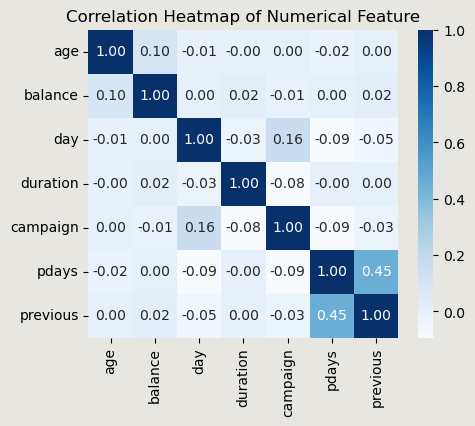

In [4]:
fig = plt.figure(figsize = (5, 4), facecolor = '#e8e6e1')
sns.heatmap(df.corr(), cmap = 'Blues', annot = True, fmt = '.2f', ax = fig.add_subplot(1,1, 1))
plt.title('Correlation Heatmap of Numerical Feature')

- Tidak terjadi multicollinearity antar fitur independent
- Korelasi positif antara fitur pdays dan previous bernilai 0.45 dari univariate analysis diperoleh sekitar 75% nasabah belum pernah mendapatkan penawaran dalam campaign sebelumnya sehingga pola antara kedua fitur ini saling beriringan/mengikuti

- Nasabah dewasa awal dengan umur dibawah 30 tahun memiliki nilai conversion rate yang tertinggi disusul dengan nasabah era silver age dengan umur diatas 50 tahun. Nasabah silver segment ini cenderung untuk memilih deposito dengan fixed rate sebagai low risk investment mereka sekaligus menjadi passive income pada usia menjelang masa retirement/pensiun.<br>
Strategi bisnis: Mengerucutkan target marketing pada nasabah dewasa awal yang telah memiliki wawasan akan pentingnya investasi deposito dan nasabah diatas 50 tahun yang membutuhkan produk deposito dimana sesuai dengan produk yang sedang dilakukan campaign oleh tim marketing<br>

- Nasabah dengan occupation student dan retired menunjukkan nilai conversion rate tertinggi, hal ini sejalan dengan insight yang telah diidentifikasi berdasarkan fitur age.<br>
Strategi bisnis: Selain menargetkan kedua segment tersebut, dirasa perlu untuk memberikan perhatian pada occupation management dan blue-collar dimana kelompok tersebut memiliki karir dan golongan terpelajar sehingga perlu diberikan pengarahan akan esensi dari produk deposito<br>

- Durasi telephone diatas 10 menit menyumbang nilai conversion rate yang paling tinggi, namun hal tersebut akan membuat pengeluaran program campaign semakin melambung seiring dengan meningkatnya durasi penawaran melalui telephone<br>
Strategi bisnis: Untuk mengoptimalkan campaign dari berbagai dimensi, pertimbangan yang kami berikan adalah memaksimalkan waktu 5 menit untuk memberikan penawaran pada nasabah yang memiliki kapasitas untuk meningkatkan potensi konversi

- Status single memiliki nilai conversion rate yang paling tinggi sedangkan status married terendah dimana mencakup lebih dari 60% nasabah yang mendapatkan penawaran campaaign<br>
Strategi bisnis: Memberikan penawaran produk yang sesuai dengan karakteristik nasabah yang telah menikah dimana kebutuhan akan arus perputaran dana lebih diperlukan dibanding bentuk tabungan mengendap dalam kontrak jangka waktu seperti rekening tabungan regular dan mendorong nasabah untuk meningkatkan jumlah tabungan

- Nasabah dengan tingkat education tertiary memiliki nilai conversion rate paling tinggi, sedangkan pendidikan primary dan secondary membentuk lebih dari 65% nasabah<br>
Strategi bisnis: Memberikan persepsi kepada nasabah dengan tingkat pendidikan dan pengetahuan finansial lebih rendah akan substansi dan benefit dari produk investasi deposito untuk hari tua nantinya

- Nasabah yang sebelumnya telah berlangganan produk deposito memiliki kecenderungan untuk tetap berlangganan pada penawaran campaign yang dilakukan dengan nilai conversion rate sebesar 64%<br>
Strategi bisnis: Konsisten memberikan penawaran pada kegiatan campaign berikutnya terhadap pelanggan yang pernah berlangganan. Selain itu juga memberikan penawaran kepada pelanggan yang belum pernah menerima campaign dengan mempertimbangkan nilai atribut nasabah lain yang berpotensi<br>

- Sepertinya terdapat beberapa fitur categorical yang imbalance diantaranya fitur default, loan dan poutcome.<br> 
Follow up: Fitur poutcome mayoritas unknown sebesar 81.75% diperkirakan akan menyebabkan performa model menurun oleh tendensi pada salah satu segment sehingga kurang dapat dipertimbangkan menjadi fitur determinan<br>

- Hubungan antar tiap segment fitur campaign dan kelas/target menunjukkan bahwa nasabah yang menerima contact dalam campaign sebanyak 1 - 2 kali memiliki nilai conversion rate yang paling tinggi. Semakin banyak penawaran yang diterima nasabah kecenderungan konversi semakin rendah.<br>
Strategi bisnis: Identifikasi nasabah dari sekitar 66% target menjadi lebih spesifik karena hanya sekitar 13% yang memutuskan untuk konversi

- Campaign lebih intensif dilakukan pada musim summer (may-aug) sedangkan musim autumn-winter (sep-dec) campaign dilakukan secara terbatas menunjukkan bahwa trend aktivitas campaign merupakan seasonal